In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#import the dataset
df = pd.read_csv("heart_2020_cleaned.csv")

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.shape

(319795, 18)

In [5]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

I have 18 columns and 319795 rows (it is a huge amount of data that could be used to build an ML model). As more data we have as better will be the outcome of the ML model. 

The dataset consists of numerical and non-numerical values(objects). It is clear to see I have numerical and categorical values(Yes, No, Male, Female)

The dataset has no missing values

In [8]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [9]:
df.describe(include = ["O"])

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


describe function shows us a statistical representation of numerical features. **BMI and SleepTime** follow normal distribution, but **PhysicalHealth and	MentalHealth** do not. They have right-skewed distribution. I will visualise the data to demonstrate it. I will also have close look at the variables if they need to be scaled. 


Category variables will be transformed into numerical through dummy encoding or other types of it.  

At this point, I also can define a label - "HeartDisease". The rest of the features will be independent variables and I will decide which of them I will take for prediction. 



In [10]:
import seaborn as sns

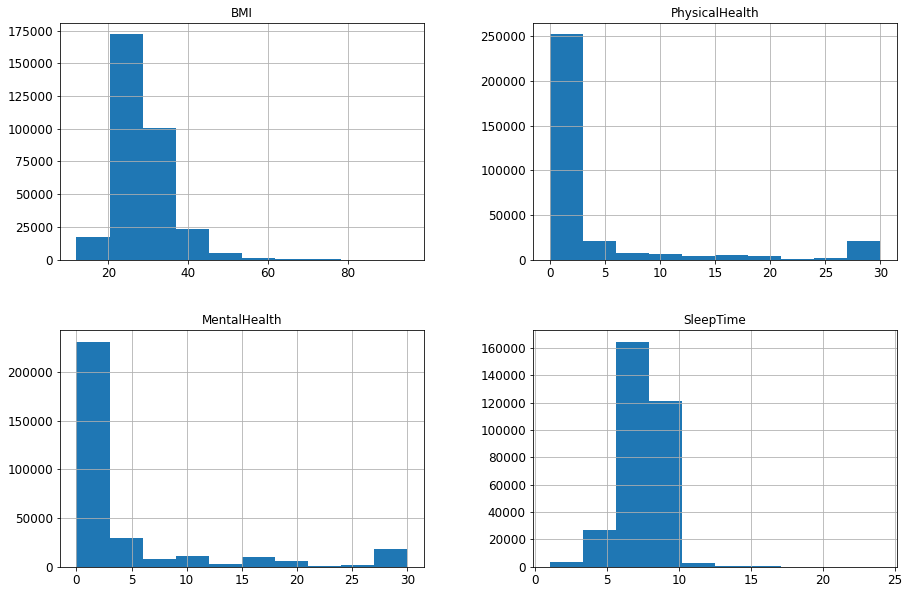

In [11]:
df_hist = df.drop(columns= ['HeartDisease','Smoking','AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 
                            'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'])
df_hist.hist(figsize=(15,10),xlabelsize=12,ylabelsize=12);

<AxesSubplot:>

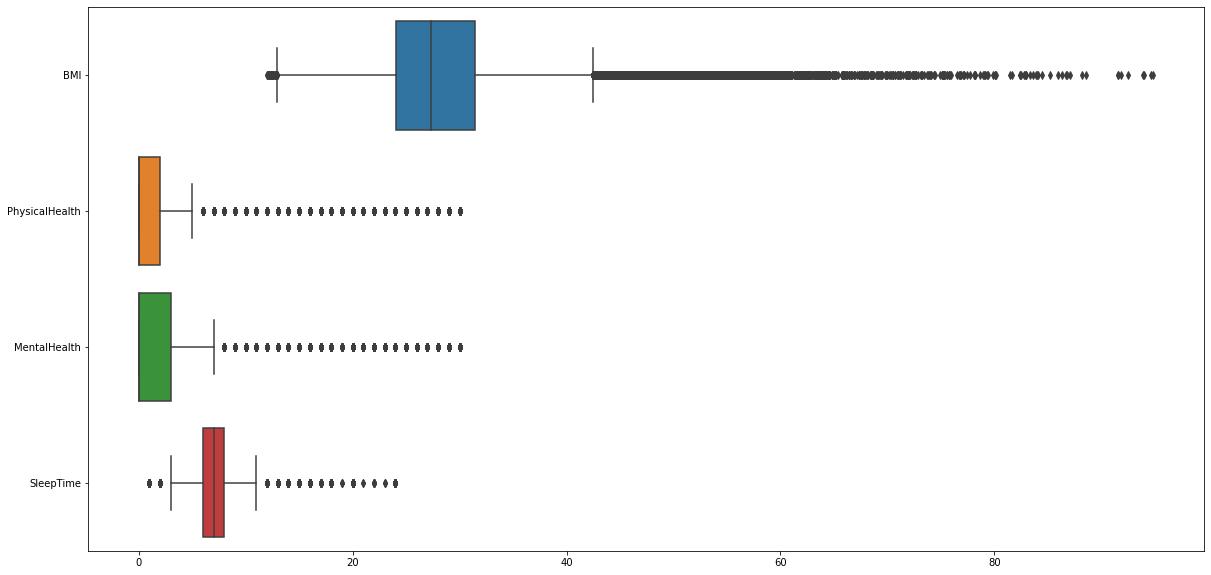

In [12]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']], orient="h")

The visualisation proved that PhysicalHealth and MentalHealth have right-skewed distribution. It also shows that BMI has multiple numbers of outliers as other features, but way fewer.  

I will not remove outliers as obesity in the USA is extremely common. This data can be important for the outcome. We can not take this data out. 

I will leave the features as they are. 

### Capping. Removing outliers.

Capping is another technique for dealing with bad data points; it is useful when we have many outliers, and removing a good amount of data from the dataset is not good. In that case, capping comes into the picture as it won’t remove them. Instead, it brings back those data points within the range we specified according to our Z-Score value.

https://www.analyticsvidhya.com/blog/2022/08/dealing-with-outliers-using-the-z-score-method/

Obesity in the USA: https://www.niddk.nih.gov/health-information/health-statistics/overweight-obesity


BMI calculator https://www.countcalculate.com/diet/reverse-bmi

In [13]:
upper_limit = df['BMI'].mean() + 3*df['BMI'].std()
lower_limit = df['BMI'].mean() - 3*df['BMI'].std()

df['BMI'] = np.where(
    df['BMI']>upper_limit,
    upper_limit,
    np.where(
        df['BMI']<lower_limit,
        lower_limit,
        df['BMI']
    )
)

In [14]:
df.shape

(319795, 18)

In [15]:
df['BMI'].describe()


count    319795.000000
mean         28.250978
std           6.048912
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          47.393699
Name: BMI, dtype: float64

C:\Users\Windows 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

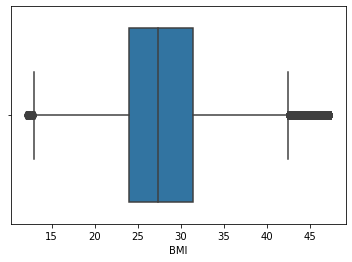

In [16]:
sns.boxplot(df["BMI"])

According to BMI statistical table in the USA we can say that overweight people could have bmi around 40+. However more than this will be extrime values. It more likely impossible to rich this range. We still have some extrime values that shows as people with obesity but in more likely real range. 





# Encoding categorical features

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
encode = LabelEncoder()

In [19]:
for x in df.columns:
    if df[x].dtype == 'object':
        df[x] = encode.fit_transform(df[x])
    

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int32  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int32  
 3   AlcoholDrinking   319795 non-null  int32  
 4   Stroke            319795 non-null  int32  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int32  
 8   Sex               319795 non-null  int32  
 9   AgeCategory       319795 non-null  int32  
 10  Race              319795 non-null  int32  
 11  Diabetic          319795 non-null  int32  
 12  PhysicalActivity  319795 non-null  int32  
 13  GenHealth         319795 non-null  int32  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int32  
 16  KidneyDisease     31

In [21]:
df.head(-5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319785,0,31.93,0,1,0,0.0,0.0,0,1,9,3,0,1,2,7.0,0,0,0
319786,1,33.20,1,0,0,0.0,0.0,0,0,8,3,2,1,4,8.0,1,0,0
319787,0,36.54,0,0,0,7.0,0.0,0,1,2,3,0,0,2,9.0,0,0,0
319788,0,23.38,0,0,0,0.0,0.0,0,0,8,3,0,1,0,6.0,0,0,0


I have only numerical features in the database at the moment. 

### Label 

I will visualise the target feature in order to see how balanced the dataset is.

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

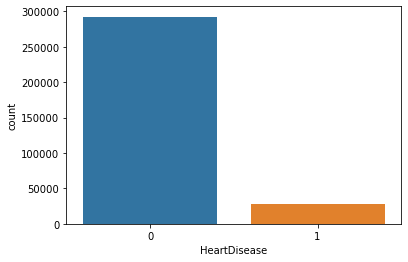

In [22]:
sns.countplot(x =df['HeartDisease'])

It is clear to see that the dataset is imbalanced. I will apply SMOTE technic in order to balance it.

### SMOTE (Synthetic Minority Oversampling Technique)
> SMOTE is one of the techniques used to solve the problem with imbalanced classes. It is balanced class distribution by randomly increasing minority class examples by replicating them. The algorithm randomly selects one or more of the k-nearest neighbours for each example in the minority class. 

Machine Learning algorithms increase accuracy by reducing the error, they do not consider the class distribution. Some of the ML models are more likely only to predict the majority class, which leads to major misclassification of the minority class compared with the majority class. 

<br>The visualisation of the classes above shows that data is imbalanced. In this case, 0 class is the major and 1 is minor.I will apply the technique in order to balance the classes. </br>

- SMOTE()
- make_classification()

are used for normalizing classification

In [23]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [24]:
# conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop(['HeartDisease'],axis=1)
y = df['HeartDisease']

In [27]:
y.values

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
X.values

array([[16.6 ,  1.  ,  0.  , ...,  1.  ,  0.  ,  1.  ],
       [20.34,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [26.58,  1.  ,  0.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [24.24,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [32.81,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [46.56,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, 
                                                           random_state = 1, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((223856, 17), (95939, 17), (223856,), (95939,))

In [30]:
y.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [31]:
# SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

smt = SMOTE()

X, y = smt.fit_resample(X, y)

In [32]:
np.bincount(y) #  method counts the occurrence of each element. Each bin value is the occurrence of its index

array([292422, 292422], dtype=int64)

C:\Users\Windows 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

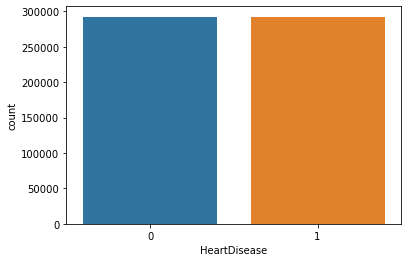

In [33]:
sns.countplot(y)

In [34]:
y.value_counts()

0    292422
1    292422
Name: HeartDisease, dtype: int64

I have a balanced label at this stage. It will improve the model prediction and class recognition to train ML model. 

# Machine Learning Implementation

In [35]:
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [36]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))


In [37]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.914983 (0.000863)
LDA: 0.907920 (0.001082)
KNN: 0.906432 (0.000859)
CART: 0.863612 (0.001579)
NB: 0.846564 (0.002582)


### Logistic Regression

In [38]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [39]:
print("accuracy_score", accuracy_score(y_test, predictions))


accuracy_score 0.9150958736194323


Cofusion matrix: 
 [[72511   595]
 [ 6193   650]]


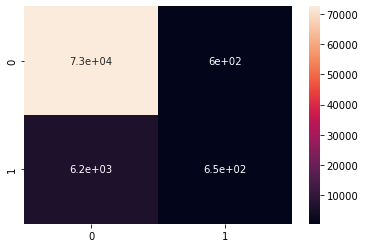

In [40]:
cm = confusion_matrix(y_test, predictions)
# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

print("Cofusion matrix: " '\n', confusion_matrix(y_test, predictions))